In [1]:
%load_ext autoreload
#To update the imported files

In [2]:
%autoreload
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error
from utilities import *
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [3]:
#Loading the y-paramter from file, might be changed to y_a etc.
train_a = pd.read_parquet('../Data_and_task/A/train_targets.parquet')
train_b = pd.read_parquet('../Data_and_task/B/train_targets.parquet')
train_c = pd.read_parquet('../Data_and_task/C/train_targets.parquet')



In [49]:
train_c_v1 = train_a.copy()
train_c_v2 = train_c.copy()

In [51]:
#examening data
# determining the name of the file
file_name = "data_before.xlsx"
# saving the excel
train_c_v1.to_excel(file_name)
#Får første data på 5193, men vi får vår første bølge på data 5942, men den ser først normalut på 5958
#Dersom vi velger 5958 burde vi vurdere å ta med de elve nullerne før denne dataen, fordi første verdien til denne kurven er 58,8. 
#Og ved å sammenligne med andre kurver ser man at det ofte er 11 0ere mellom slutt på den ene kurven og start på neste når 
#den ene kurven starter eller slutter med en så stor verdi

train_c_v2.drop(range(0, 5958), inplace=True)
# determining the name of the file
file_name2 = "data_after.xlsx"
 
# saving the excel
train_c_v2.to_excel(file_name2)
print('DataFrame is written to Excel File successfully.')



DataFrame is written to Excel File successfully.


In [52]:
def remove_NaN_from_Y(y_train,y_features):
    y_train[y_features].fillna(method='bfill', inplace=True, limit=1)
    y_train[y_features].fillna(method='ffill', inplace=True)
    return y_train

In [4]:
#Loading estimated/forecasted training_weather from file
X_train_estimated_a = pd.read_parquet('../Data_and_task/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../Data_and_task/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../Data_and_task/C/X_train_estimated.parquet')

In [5]:
#Loading observed weather from file
X_train_observed_a = pd.read_parquet('../Data_and_task/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../Data_and_task/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../Data_and_task/C/X_train_observed.parquet')

In [6]:
#Loading estimated/forecasted test_weather from file
X_test_estimated_a = pd.read_parquet('../Data_and_task/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('../Data_and_task/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('../Data_and_task/C/X_test_estimated.parquet')

In [66]:
#X_train_estimated_a.head()
#X_test_estimated_b.head()
#X_test_estimated_c.head()

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.2,1.286,NaN,0.0,0.0,1178.000000,0.0,271.100006,0.0,0.0,0.0,0.0,73.699997,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,998.200012,1004.500000,0.0,0.0,81.099998,1010.799988,NaN,0.0,0.0,0.0,0.0,10.519000,-11.223,0.0,273.700012,73.699997,31411.000000,3.5,1.5,3.1,-0.0
1,2023-04-30 07:00:04,2023-05-01 00:15:00,4.2,1.286,NaN,0.0,0.0,1217.000000,0.0,271.100006,0.0,0.0,0.0,0.0,70.800003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.799988,0.0,0.0,998.099976,1004.299988,0.0,0.0,81.000000,1010.599976,NaN,0.0,0.0,0.0,0.0,14.202000,-10.862,0.0,273.700012,70.800003,31295.800781,3.4,1.5,3.1,-0.0
2,2023-04-30 07:00:04,2023-05-01 00:30:00,4.1,1.286,NaN,0.0,0.0,1256.000000,0.0,271.000000,0.0,0.0,0.0,0.0,67.900002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,998.000000,1004.200012,0.0,0.0,80.900002,1010.500000,NaN,0.0,0.0,0.0,0.0,17.868000,-10.397,0.0,273.700012,67.900002,31178.599609,3.4,1.4,3.1,-0.0
3,2023-04-30 07:00:04,2023-05-01 00:45:00,4.1,1.286,NaN,0.0,0.0,1295.000000,0.0,270.899994,0.0,0.0,0.0,0.0,64.800003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,997.799988,1004.099976,0.0,0.0,80.800003,1010.400024,NaN,0.0,0.0,0.0,0.0,21.513000,-9.830,0.0,273.700012,64.800003,31082.500000,3.4,1.4,3.1,-0.0
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.1,1.286,NaN,0.0,0.0,1334.099976,0.0,270.899994,0.0,0.0,0.0,0.0,61.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.400024,0.0,0.0,997.700012,1004.000000,0.0,0.0,80.599998,1010.299988,NaN,0.0,0.0,0.0,0.0,25.134001,-9.163,0.0,273.700012,61.599998,31051.400391,3.4,1.4,3.1,-0.0


In [11]:
#Cleaning data such that only wanted features are included
selected_features = [
    "date_forecast", "clear_sky_rad:W", "diffuse_rad:W", "direct_rad:W",
    "absolute_humidity_2m:gm3", "effective_cloud_cover:p",
    "is_day:idx", "is_in_shadow:idx", "fresh_snow_12h:cm", "fresh_snow_1h:cm",
    "fresh_snow_24h:cm", "fresh_snow_3h:cm", "fresh_snow_6h:cm",
    "snow_depth:cm", "snow_melt_10min:mm", "sun_azimuth:d", 
    "sun_elevation:d", "wind_speed_10m:ms"
]

selected_features2 = [
    "date_forecast", "absolute_humidity_2m:gm3", "air_density_2m:kgm3", "ceiling_height_agl:m", "clear_sky_energy_1h:J",
    "clear_sky_rad:W", "cloud_base_agl:m", "dew_or_rime:idx", "dew_point_2m:K", "diffuse_rad:W", "diffuse_rad_1h:J",
    "direct_rad:W", "direct_rad_1h:J", "effective_cloud_cover:p", "elevation:m", "fresh_snow_12h:cm", "fresh_snow_1h:cm",
    "fresh_snow_24h:cm", "fresh_snow_3h:cm", "fresh_snow_6h:cm", "is_day:idx", "is_in_shadow:idx", "msl_pressure:hPa", "precip_5min:mm",
    "precip_type_5min:idx", "pressure_100m:hPa", "pressure_50m:hPa", "prob_rime:p", "rain_water:kgm2", "relative_humidity_1000hPa:p",
    "sfc_pressure:hPa", "snow_density:kgm3", "snow_depth:cm", "snow_drift:idx", "snow_melt_10min:mm", "snow_water:kgm2", "sun_azimuth:d",
    "sun_elevation:d", "super_cooled_liquid_water:kgm2", "t_1000hPa:K", "total_cloud_cover:p", "visibility:m", "wind_speed_10m:ms",
    "wind_speed_u_10m:ms", "wind_speed_v_10m:ms", "wind_speed_w_1000hPa:ms"
]

selected_features2 = ["date_forecast","absolute_humidity_2m:gm3", "air_density_2m:kgm3", "dew_point_2m:K",
                 "msl_pressure:hPa", "pressure_100m:hPa", "pressure_50m:hPa", "sfc_pressure:hPa","t_1000hPa:K"]


#Defining y_fetures, will always be the same
y_features = ["time", "pv_measurement"]

#for A

X_train_observed_a_clean = X_train_observed_a[selected_features].copy()
X_train_estimated_a_clean = X_train_estimated_a[selected_features].copy()
#for B 
#X_train_observed_b_clean = X_train_observed_b[selected_features].copy()
#X_train_estimated_b_clean = X_train_estimated_b[selected_features].copy()


X_test_estimated_a_clean = X_test_estimated_a[selected_features][::4].drop(columns = ["date_forecast"]).copy()
X_test_estimated_b_clean = X_test_estimated_b[selected_features][::4].drop(columns = ["date_forecast"]).copy()
X_test_estimated_c_clean = X_test_estimated_c[selected_features][::4].drop(columns = ["date_forecast"]).copy()


correlation_df = X_test_estimated_a_clean.copy()
correlation_df = correlation_df.assign(pv_measurement=train_a["pv_measurement"])
"""
df_corr = correlation_df[["absolute_humidity_2m:gm3", "air_density_2m:kgm3", "ceiling_height_agl:m", "clear_sky_energy_1h:J",
    "clear_sky_rad:W", "cloud_base_agl:m", "dew_or_rime:idx", "dew_point_2m:K", "diffuse_rad:W", "diffuse_rad_1h:J",
    "direct_rad:W", "direct_rad_1h:J", "effective_cloud_cover:p",  "is_day:idx", "is_in_shadow:idx", "msl_pressure:hPa", "precip_5min:mm",
    "precip_type_5min:idx", "pressure_100m:hPa", "pressure_50m:hPa", "rain_water:kgm2", "relative_humidity_1000hPa:p",
    "sfc_pressure:hPa", "snow_water:kgm2", "sun_azimuth:d",
    "sun_elevation:d", "super_cooled_liquid_water:kgm2", "t_1000hPa:K", "total_cloud_cover:p", "visibility:m", "wind_speed_10m:ms",
    "wind_speed_u_10m:ms", "wind_speed_v_10m:ms", "pv_measurement"]].corr()

fjerne = ["elevation:m","fresh_snow_12h:cm", "fresh_snow_1h:cm",
        "fresh_snow_24h:cm", "fresh_snow_3h:cm", "fresh_snow_6h:cm", 
        "prob_rime:p","snow_density:kgm3", "snow_depth:cm", "snow_drift:idx", 
        "snow_melt_10min:mm","wind_speed_w_1000hPa:ms"]
#beste fetures fra A (correlation større en 0.30 i absoluttverdi)
beste_fetures_A = []

#beste fetures fra B (correlation større en 0.30 i absoluttverdi)

beste_fetures_B = ["absolute_humidity_2m:gm3", "air_density_2m:kgm3", "dew_point_2m:K",
                 "msl_pressure:hPa", "pressure_100m:hPa", "pressure_50m:hPa", "sfc_pressure:hPa","t_1000hPa:K"]
mask = np.triu(np.ones_like(df_corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
sns.heatmap(df_corr, mask=mask, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis for all sites'); """

             date_forecast  clear_sky_rad:W  diffuse_rad:W  direct_rad:W  \
0      2019-06-02 22:00:00              0.0            0.0           0.0   
1      2019-06-02 22:15:00              0.0            0.0           0.0   
2      2019-06-02 22:30:00              0.0            0.0           0.0   
3      2019-06-02 22:45:00              0.0            0.0           0.0   
4      2019-06-02 23:00:00              0.0            0.0           0.0   
...                    ...              ...            ...           ...   
118664 2022-10-21 00:00:00              0.0            0.0           0.0   
118665 2022-10-21 00:15:00              0.0            0.0           0.0   
118666 2022-10-21 00:30:00              0.0            0.0           0.0   
118667 2022-10-21 00:45:00              0.0            0.0           0.0   
118668 2022-10-21 01:00:00              0.0            0.0           0.0   

        absolute_humidity_2m:gm3  effective_cloud_cover:p  is_day:idx  \
0             

'\ndf_corr = correlation_df[["absolute_humidity_2m:gm3", "air_density_2m:kgm3", "ceiling_height_agl:m", "clear_sky_energy_1h:J",\n    "clear_sky_rad:W", "cloud_base_agl:m", "dew_or_rime:idx", "dew_point_2m:K", "diffuse_rad:W", "diffuse_rad_1h:J",\n    "direct_rad:W", "direct_rad_1h:J", "effective_cloud_cover:p",  "is_day:idx", "is_in_shadow:idx", "msl_pressure:hPa", "precip_5min:mm",\n    "precip_type_5min:idx", "pressure_100m:hPa", "pressure_50m:hPa", "rain_water:kgm2", "relative_humidity_1000hPa:p",\n    "sfc_pressure:hPa", "snow_water:kgm2", "sun_azimuth:d",\n    "sun_elevation:d", "super_cooled_liquid_water:kgm2", "t_1000hPa:K", "total_cloud_cover:p", "visibility:m", "wind_speed_10m:ms",\n    "wind_speed_u_10m:ms", "wind_speed_v_10m:ms", "pv_measurement"]].corr()\n\nfjerne = ["elevation:m","fresh_snow_12h:cm", "fresh_snow_1h:cm",\n        "fresh_snow_24h:cm", "fresh_snow_3h:cm", "fresh_snow_6h:cm", \n        "prob_rime:p","snow_density:kgm3", "snow_depth:cm", "snow_drift:idx", \n  

In [8]:
#Training a Linear regression model on X_observed_a and testing it on X_estimated_a and evaluating it on MAE, PURELY for testing!
#See below for how its done when submitting for A
X_train_observed_a_resized, y_train_observed_a = resize_trainingdata(X_train_observed_a_clean, train_a, "date_forecast", y_features)
X_train_estimated_a_resized, y_train_estimated_a = resize_trainingdata(X_train_estimated_a_clean, train_a, "date_forecast", y_features)



#Scaling the data for more fair comparions and faster convergence, ChatGPT
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_observed_a_resized)
X_test_scaled = scaler.fit_transform(X_train_estimated_a_resized)

#Training the model
reg = LinearRegression()
reg.fit(X_train_scaled, y_train_observed_a["pv_measurement"])

# Make predictions
y_pred = reg.predict(X_test_scaled)

#Evaluate mean asbolute error
mae = mean_absolute_error(y_train_estimated_a["pv_measurement"], y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 382.9974707367402


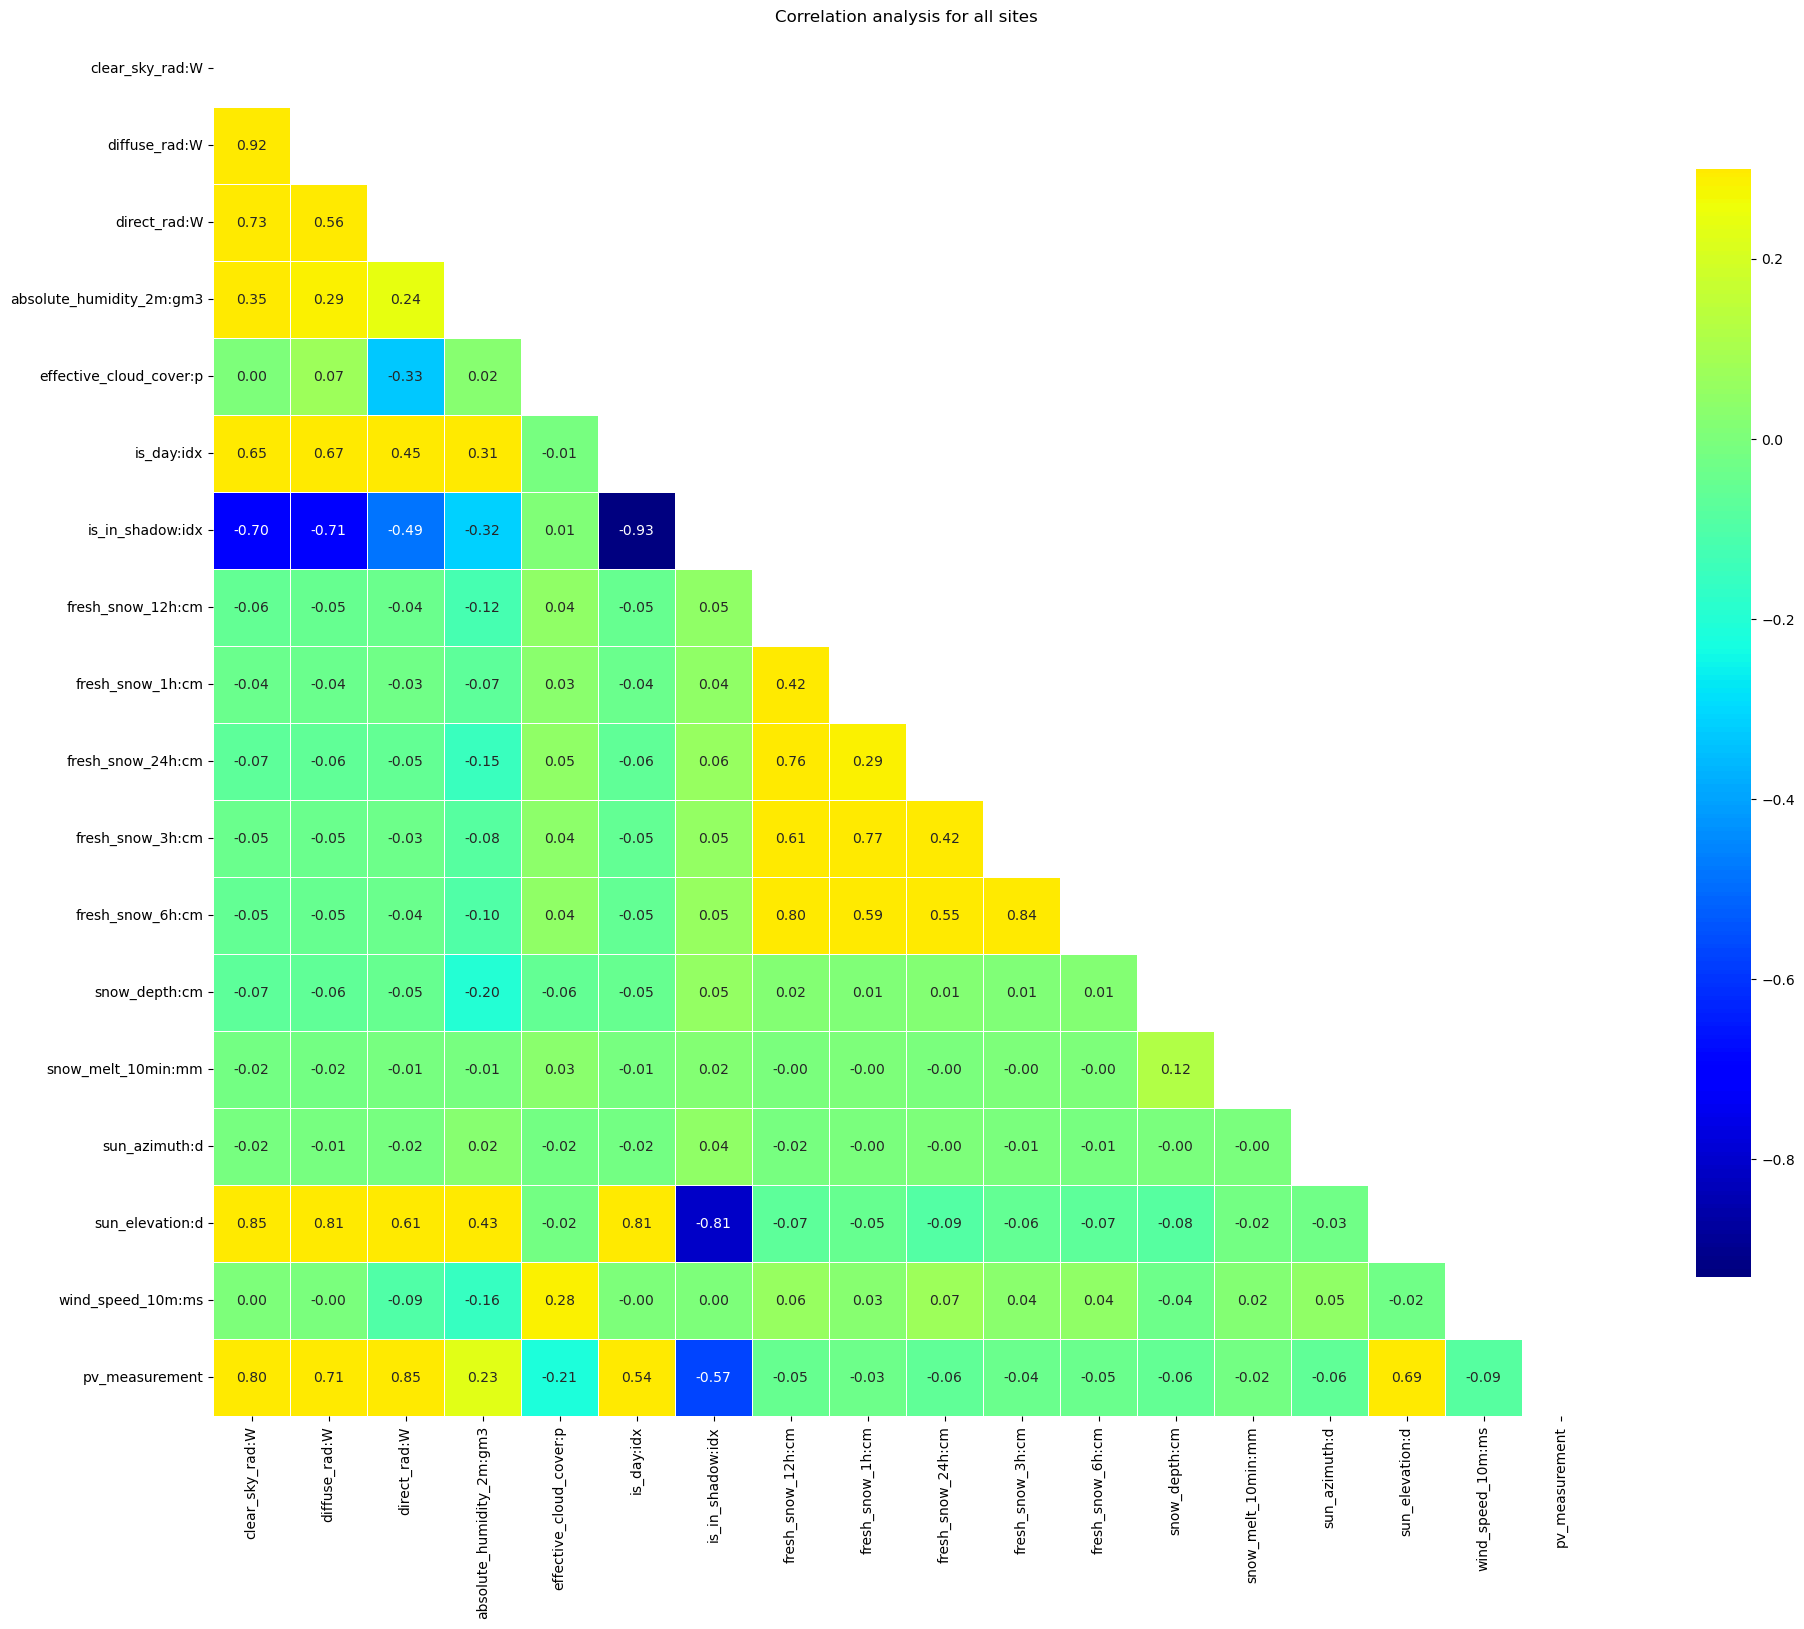

In [66]:
#corr etter simen sin reshape
correlation_df = X_train_observed_a_resized.copy()
correlation_df = correlation_df.assign(pv_measurement=y_train_observed_a["pv_measurement"])

df_corr = correlation_df[[ "clear_sky_rad:W", "diffuse_rad:W", "direct_rad:W",
    "absolute_humidity_2m:gm3", "effective_cloud_cover:p",
    "is_day:idx", "is_in_shadow:idx", "fresh_snow_12h:cm", "fresh_snow_1h:cm",
    "fresh_snow_24h:cm", "fresh_snow_3h:cm", "fresh_snow_6h:cm",
    "snow_depth:cm", "snow_melt_10min:mm", "sun_azimuth:d", 
    "sun_elevation:d", "wind_speed_10m:ms", "pv_measurement"
]].corr()

fjerne = ["elevation:m","fresh_snow_12h:cm", "fresh_snow_1h:cm",
        "fresh_snow_24h:cm", "fresh_snow_3h:cm", "fresh_snow_6h:cm", 
        "prob_rime:p","snow_density:kgm3", "snow_depth:cm", "snow_drift:idx", 
        "snow_melt_10min:mm","wind_speed_w_1000hPa:ms"]
#beste fetures fra A (correlation større en 0.30 i absoluttverdi)
beste_fetures_A = []

#beste fetures fra B (correlation større en 0.30 i absoluttverdi)

beste_fetures_B = ["absolute_humidity_2m:gm3", "air_density_2m:kgm3", "dew_point_2m:K",
                 "msl_pressure:hPa", "pressure_100m:hPa", "pressure_50m:hPa", "sfc_pressure:hPa","t_1000hPa:K"]
mask = np.triu(np.ones_like(df_corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
sns.heatmap(df_corr, mask=mask, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis for all sites'); 

In [67]:
X_train_observed_a_resized.shape

(29667, 45)

In [68]:
y_train_observed_a.shape

(29667, 2)

In [80]:
#for b
X_train_observed_b_resized, y_train_observed_b = resize_trainingdata(X_train_observed_b_clean, train_b, "date_forecast", y_features)
X_train_estimated_b_resized, y_train_estimated_b = resize_trainingdata(X_train_estimated_b_clean, train_b, "date_forecast", y_features)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_observed_b_resized)
X_test_scaled = scaler.fit_transform(X_train_estimated_b_resized)

y_train_observed_b = remove_NaN_from_Y(y_train_observed_b,"pv_measurement")
#Training the model
reg = LinearRegression()
reg.fit(X_train_scaled, y_train_observed_b["pv_measurement"])

# Make predictions
y_pred = reg.predict(X_test_scaled)

#Evaluate mean asbolute error
mae = mean_absolute_error(y_train_estimated_b["pv_measurement"], y_pred)
print("Mean Absolute Error:", mae)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
29217    0.0
29218    0.0
29219    0.0
29220    0.0
29221    0.0
Name: pv_measurement, Length: 29222, dtype: float64
Mean Absolute Error: 56.57548303127816


                     time  pv_measurement
0     2019-06-02 22:00:00            0.00
1     2019-06-02 23:00:00            0.00
2     2019-06-03 00:00:00            0.00
3     2019-06-03 01:00:00            0.00
4     2019-06-03 02:00:00           19.36
...                   ...             ...
34080 2023-04-30 19:00:00            9.02
34081 2023-04-30 20:00:00            0.00
34082 2023-04-30 21:00:00            0.00
34083 2023-04-30 22:00:00            0.00
34084 2023-04-30 23:00:00            0.00

[34085 rows x 2 columns]


In [9]:
#Training model, running infernece on testing data and saving it in a csv file ready for submission
X_train_observed_a_resized, y_train_observed_a = resize_trainingdata(X_train_observed_a_clean, train_a, "date_forecast", y_features)
X_train_estimated_a_resized, y_train_estimated_a = resize_trainingdata(X_train_estimated_a_clean, train_a, "date_forecast", y_features)

#Merging observed and estimated data to one big df
X_train_a = pd.concat([X_train_observed_a_resized, X_train_estimated_a_resized], ignore_index=True)
y_train_a = pd.concat([y_train_observed_a, y_train_estimated_a], ignore_index=True)
X_test = pd.concat([X_test_estimated_a_clean, X_test_estimated_b_clean, X_test_estimated_c_clean], ignore_index=True)

#Scaling the data for more fair comparions and faster convergence, ChatGPT
scaler = StandardScaler()
X_train_a_scaled = scaler.fit_transform(X_train_a)
X_test_a_scaled=scaler.fit_transform(X_test)

#Training the models
#Model A:
reg_a = LinearRegression()
reg_a.fit(X_train_a, y_train_a["pv_measurement"])

# Make predictions for A,B,C on the model trained on only A. Problems with the B and C datasets which need to be explored
y_pred = reg_a.predict(X_test_a_scaled)

#Saving y_pred in a proper csv file
filename = "CSV/second_submission.csv"
submission(filename, y_pred)

C:\Users\Gustav\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
